# <u> Project Name</u> : Shopper Spectrum – Customer Segmentation & Product Recommendation

Project summary: <br>
Shopper Spectrum is a data-driven Streamlit web application that performs:

- Customer segmentation using the RFM model (Recency, Frequency, Monetary),

- KMeans clustering to classify customers into meaningful behavioral groups,

- Product recommendation based on item similarity,

- An interactive UI where users can predict a customer’s segment or explore product alternatives.

<br>
Shopper Spectrum is a data-driven web application designed to segment customers and recommend products based on behavioral patterns. Using the Online Retail dataset, the project begins with thorough data preprocessing, which includes removing invalid or missing values, excluding cancelled invoices, and filtering out negative transactions. Core customer metrics—Recency, Frequency, and Monetary—are computed to form the foundation of RFM analysis.

These RFM features are standardized and clustered using the KMeans algorithm. The optimal number of clusters is determined using the elbow method, and the model is trained to classify customers into behavior-based segments. In this implementation, 4 segments are identified: At-Risk Customers (infrequent, low spenders with long inactivity),Regular Buyer,Occasional Shopper, High-Value Customers (recent, high spenders). Trained models and scalers are serialized with pickle for use in a Streamlit-based application.

The app includes an interactive Customer Segmentation tool where users can input Recency, Frequency, and Monetary values to predict a customer’s segment in real-time. It also features a Product Recommendation system based on a similarity matrix built from product co-occurrence in transactions, allowing users to input a product name and receive top similar items.

Throughout the project, exploratory data analysis (EDA) is performed to visualize sales trends, top-selling products, and customer value distributions. These insights support marketing strategies such as loyalty targeting, re-engagement campaigns, and personalized recommendations. Technologies used include Python, pandas, scikit-learn, seaborn, and Streamlit, resulting in a complete, interactive solution ready for deployment and business use.


## github link: https://github.com/Tharunkunamalla/Project-4-Shopper_spectrum-segmentation.git

Streamlit app: https://project-4-shopperspectrum-segmentation-2ptwvgivtsdfuyqgxqmxwr.streamlit.app/

# Name:  Tharun kunamalla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/online_retail.csv")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2022 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2022 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2022 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2022 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2022 8.26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2023 12.50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2023 12.50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2023 12.50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2023 12.50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2023 12.50,4.95,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

To Remove the Null-Id in the CustomerID

In [ ]:
df = df[~df.CustomerID.isnull()]

To Remove the InvoiceNo which starts with 'C'

In [ ]:
df = df[~df.InvoiceNo.astype(str).str.startswith('C')]

Take the Quantity and UnitPrice which is non negative

In [ ]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

Add a new column in the Dataset

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.shape

(397884, 9)

To Drop the Duplicates

In [ ]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2022 8.26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2022 8.26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2022 8.26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2022 8.26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2022 8.26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2023 12.50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2023 12.50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2023 12.50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2023 12.50,4.15,12680.0,France,16.60


Formatting the dataset of InvoiceDate

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H.%M', errors='coerce')


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


EDA

Visualize Transactions Over Time:

- Plot the number of transactions per month or day to identify trends and seasonality

/tmp/ipython-input-3800985246.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique().plot(kind='line', figsize=(10,4))


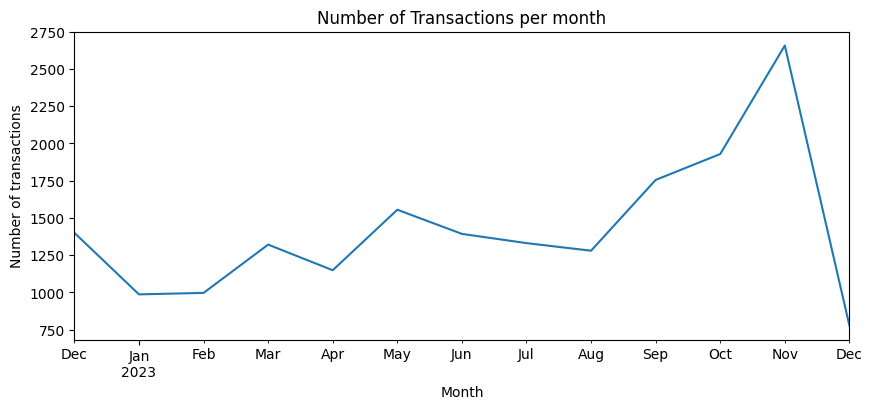

In [ ]:
df.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique().plot(kind='line', figsize=(10,4))
plt.title("Number of Transactions per month")
plt.xlabel("Month")
plt.ylabel("Number of transactions")
plt.show()

Sales by Country:

- See how many transactions or customers come from each country

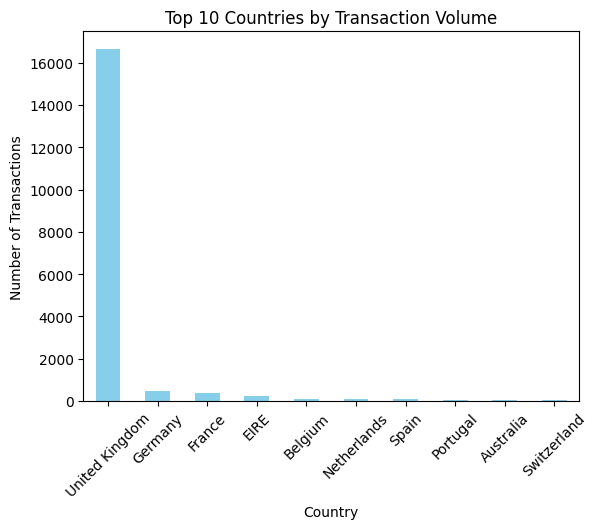

In [ ]:
# Count number of unique InvoiceNo per country (i.e., transaction volume)
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Plot Top 10 Countries by Transaction Volume
country_sales.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Transaction Volume")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


Top 10 Best Selling Products

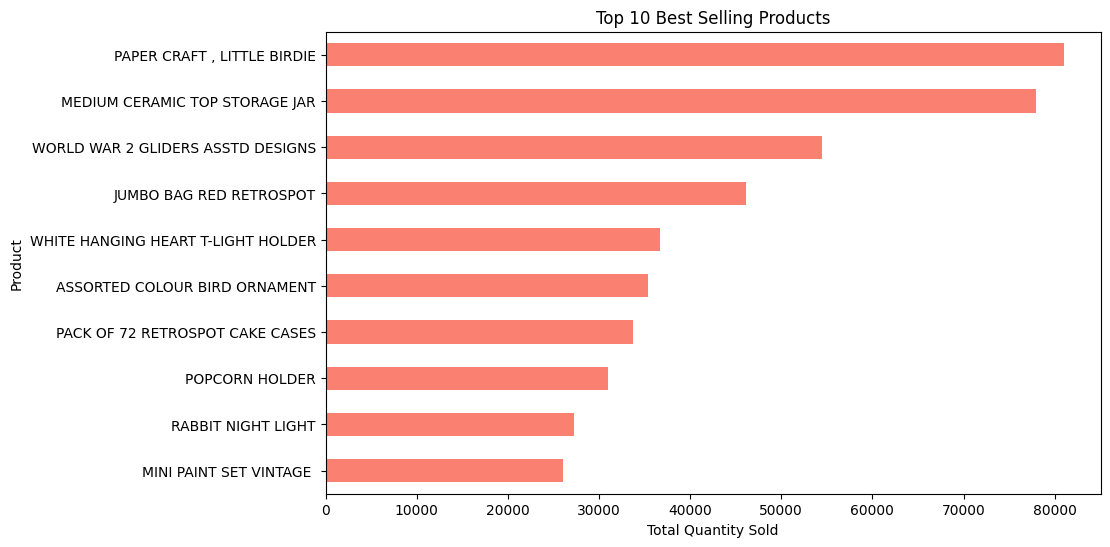

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='salmon')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()

Invoice Amount Distribution

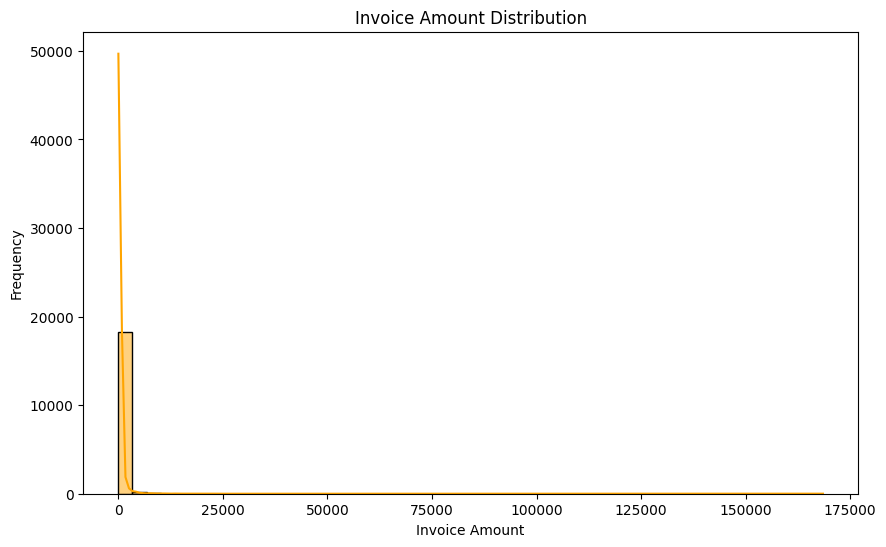

In [ ]:
df['InvoiceAmount'] = df.groupby('InvoiceNo')['TotalPrice'].transform('sum')
invoice_amount_dist = df[['InvoiceNo', 'InvoiceAmount']].drop_duplicates()['InvoiceAmount']
plt.figure(figsize=(10, 6))
sns.histplot(invoice_amount_dist, bins=50, kde=True, color='orange')
plt.title("Invoice Amount Distribution")
plt.xlabel("Invoice Amount")
plt.ylabel("Frequency")
plt.show()

Customer Monetary Value Distribution

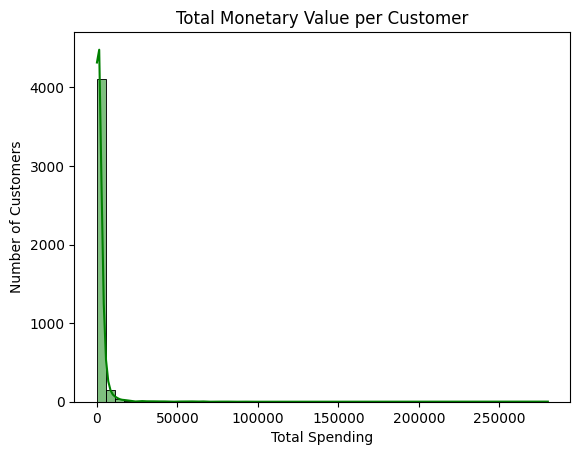

In [ ]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()
sns.histplot(customer_spending, bins=50, kde=True, color='green')
plt.title("Total Monetary Value per Customer")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

Distribution of Quantities and Prices:

Understand the spread of purchase quantities and prices

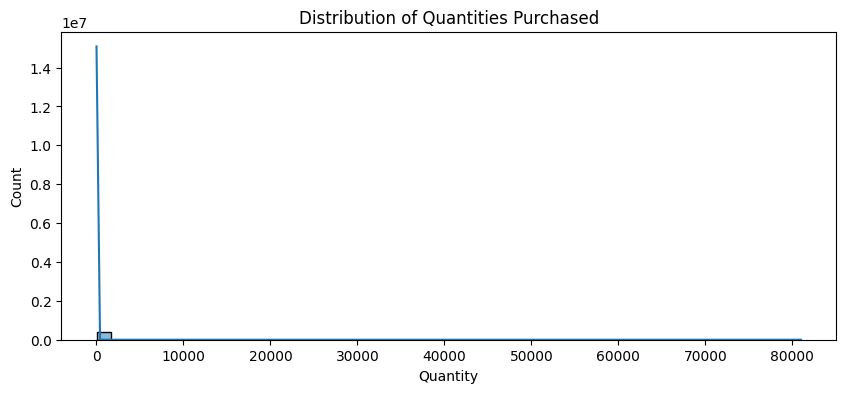

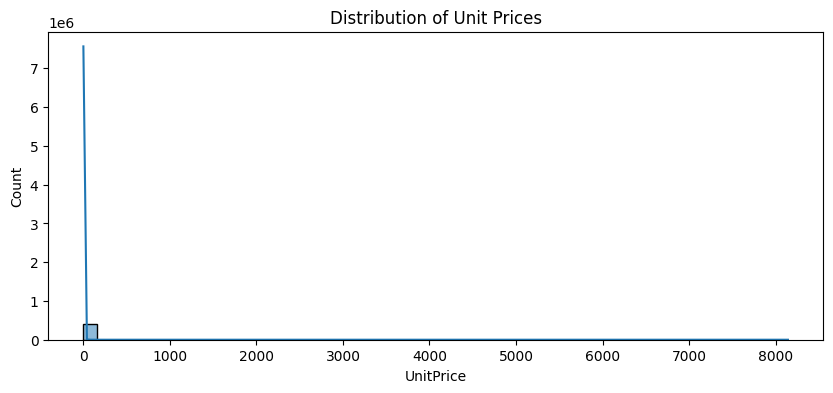

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantities Purchased')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Prices')
plt.show()


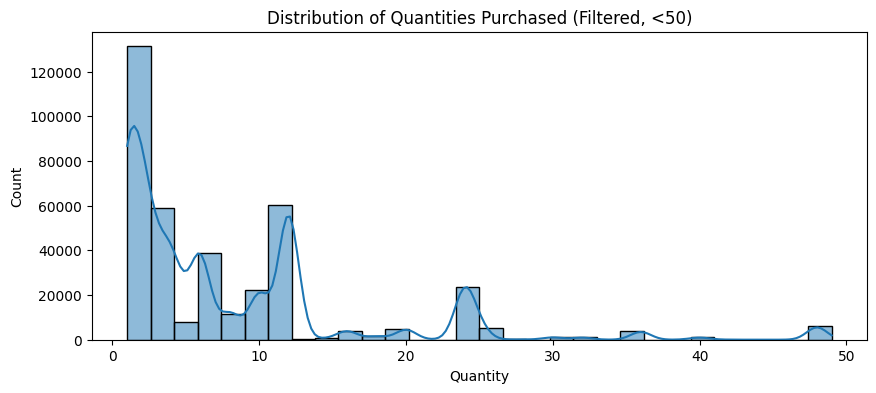

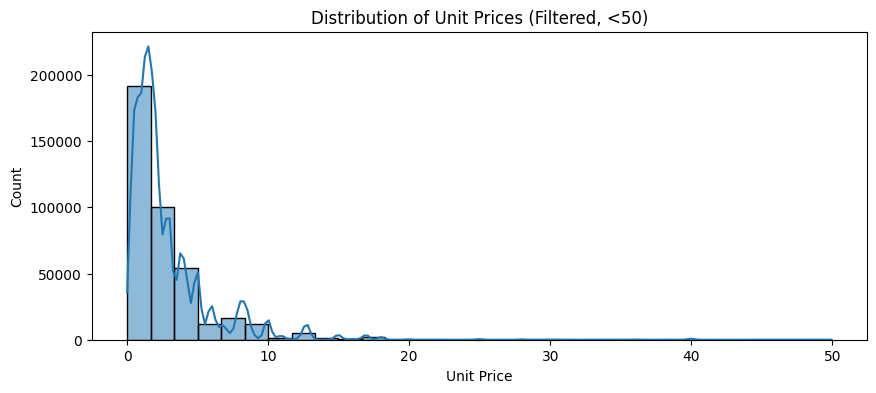

In [ ]:
# Filter out extreme values for visualization
filtered_quantities = df[df['Quantity'] < 50]['Quantity']
filtered_unit_prices = df[df['UnitPrice'] < 50]['UnitPrice']

# Plot filtered Quantity distribution
plt.figure(figsize=(10,4))
sns.histplot(filtered_quantities, bins=30, kde=True)
plt.title('Distribution of Quantities Purchased (Filtered, <50)')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

# Plot filtered UnitPrice distribution
plt.figure(figsize=(10,4))
sns.histplot(filtered_unit_prices, bins=30, kde=True)
plt.title('Distribution of Unit Prices (Filtered, <50)')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()


#  RFM Feature Engineering
      - Recency
      - Frequency
      - Monetary
It’s a classic customer segmentation model.

In [ ]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

Finds the latest purchase date in your dataset.
Adds 1 day to it to simulate the "analysis date"

In [ ]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate":lambda x : (ref_date - x.max()).days, "InvoiceNo" : "nunique",
    "Quantity" : lambda x : (x * df.loc[x.index, "UnitPrice"]).sum()
}).reset_index()

In [ ]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

Standardize RFM

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

Elbow Method

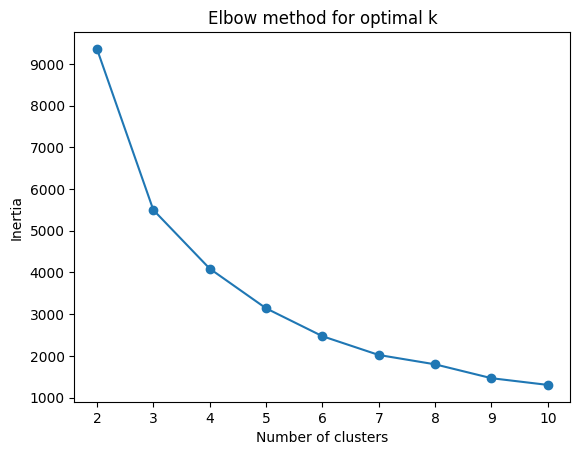

In [ ]:
inertia = []
sil_scores = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, model.labels_))


plt.plot(K, inertia, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method for optimal k")
plt.show()


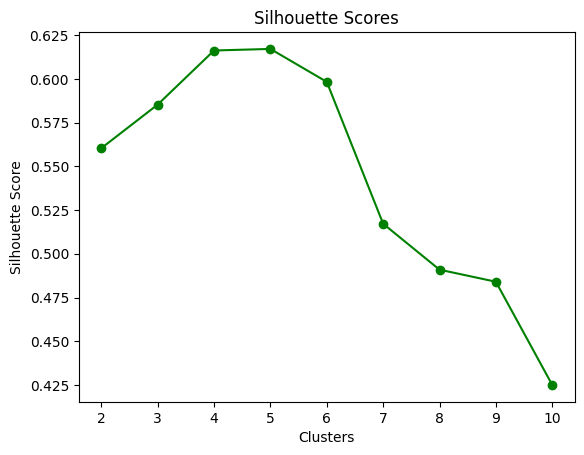

In [ ]:
plt.plot(K, sil_scores, marker="o", color="green")
plt.title("Silhouette Scores")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Final Clustering

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [ ]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [ ]:
import pickle

Save KMeans and Scaler

In [ ]:
with open("rfm_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("rfm_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

Product Recommendation Matrix (Item-based)

In [ ]:
product_df = df.groupby(["StockCode", "Description"])["Quantity"].sum().reset_index()
product_pivot = df.pivot_table(index="CustomerID", columns="Description", values="Quantity", aggfunc="sum").fillna(0)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(product_pivot.T)

sim_df = pd.DataFrame(similarity_matrix, index=product_pivot.columns, columns=product_pivot.columns)


Save Recommendation Matrix

In [ ]:
with open("product_similarity.pkl", "wb") as f:
    pickle.dump(sim_df, f)

Example

In [ ]:
# Product Recommendation
def recommend_products(product_name, top_n=5):
    if product_name not in sim_df.columns:
        return ["Product not found."]
    similar_items = sim_df[product_name].sort_values(ascending=False)[1:top_n + 1]
    return similar_items.index.tolist()


In [ ]:
# Cluster Prediction
def predict_cluster(r, f, m):
    x = scaler.transform([[r, f, m]])
    return kmeans.predict(x)[0]

In [ ]:
print("Recommended for 'WHITE HANGING HEART T-LIGHT HOLDER':", recommend_products("WHITE HANGING HEART T-LIGHT HOLDER"))
print("Cluster Prediction for R=20, F=5, M=100:", predict_cluster(20, 5, 100))

Recommended for 'WHITE HANGING HEART T-LIGHT HOLDER': ['GIN + TONIC DIET METAL SIGN', 'RED HANGING HEART T-LIGHT HOLDER', 'WASHROOM METAL SIGN', 'LAUNDRY 15C METAL SIGN', 'GREEN VINTAGE SPOT BEAKER']
Cluster Prediction for R=20, F=5, M=100: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
